## Load packages

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from keras.datasets import mnist

Using TensorFlow backend.


## Define functions

### Sigmoid

In [0]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """ 
     
    s = 1 / (1 + np.exp(-z)) 
    
    return s

### Initialize weights

In [0]:
def initialize_weights(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """

 
    w = np.zeros(shape=(dim,1))
    b = 0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b


### Forward and backward propagation

In [0]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained in the assignment

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px, 1)(784,1) 
    b -- bias, a scalar(1)
    X -- data of size (number of examples, num_px * num_px)(#,784)
    Y -- true "label" vector of size (1, number of examples)(1,#)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    
    m = X.shape[0]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    z = np.dot(w.T, X) + b
    activ = sigmoid(z)  # compute activation
    cost = (- 1/m) * np.sum(Y * np.log(activ) + (1 - Y) * (np.log(1 - activ)))
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1/m) * np.dot(X, (activ - Y).T)
    db = (1/m) * np.sum(activ - Y)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

### Gradient descent

In [0]:
def gradient_descent(w, b, X, Y, num_iterations, learning_rate):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px, number of examples)
    Y -- true "label" vector of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation
      
        grads, cost = propagate(w, b, X, Y)
      
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w = w - learning_rate * dw  
        b = b - learning_rate * db
      
        # Record the costs
        if i % 5 == 0:
            costs.append(cost)
            # Print the cost every 5 iterations
            print ("Cost after iteration %i: %f" % (i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs
  

### Make predictions

In [0]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[0]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[1], 1)
    
    # Compute vector "A" predicting the probabilities of the picture containing a 1
    
    A = sigmoid(np.dot(w.T, X.T) + b)
    
    
    for i in range(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[0, i] > 0.5:
          Y_prediction[0, i] = 1 
        else:
          Y_prediction[0, i] = 0
        

    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

## Merge functions and run your model

In [0]:
# LOAD DATA
class0 = 0
class1 = 1

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[np.isin(y_train,[class0,class1]),:,:]
y_train = 1*(y_train[np.isin(y_train,[class0,class1])]>class0)
x_test = x_test[np.isin(y_test,[class0,class1]),:,:]
y_test = 1*(y_test[np.isin(y_test,[class0,class1])]>class0)

In [8]:
# RESHAPE

x_train_flat = x_train.reshape(x_train.shape[0],-1)
print(x_train_flat.shape)
print('Train: '+str(x_train_flat.shape[0])+' images and '+str(x_train_flat.shape[1])+' neurons \n')

x_test_flat = x_test.reshape(x_test.shape[0],-1)
print(x_test_flat.shape)
print('Test: '+str(x_test_flat.shape[0])+' images and '+str(x_test_flat.shape[1])+' neurons \n')

# ***NORMALIZE***
x_train_flat = x_train_flat / 255
x_test_flat = x_test_flat / 255

(12665, 784)
Train: 12665 images and 784 neurons 

(2115, 784)
Test: 2115 images and 784 neurons 



### Train the model (in training set)

In [9]:
# Initialize parameters with zeros (≈ 1 line of code)
w, b = initialize_weights(x_train_flat.shape[1])

# Gradient descent (≈ 1 line of code)
learning_rate = 0.005
num_iterations = 2000
parameters, grads, costs = gradient_descent(w, b, x_train_flat.T, y_train, 2000, 0.005)

Cost after iteration 0: 11.197333
Cost after iteration 5: 3.519701
Cost after iteration 10: 2.163082
Cost after iteration 15: 1.603263
Cost after iteration 20: 1.294621
Cost after iteration 25: 1.097539
Cost after iteration 30: 0.959997
Cost after iteration 35: 0.858112
Cost after iteration 40: 0.779344
Cost after iteration 45: 0.716457
Cost after iteration 50: 0.664974
Cost after iteration 55: 0.621971
Cost after iteration 60: 0.585456
Cost after iteration 65: 0.554020
Cost after iteration 70: 0.526641
Cost after iteration 75: 0.502556
Cost after iteration 80: 0.481184
Cost after iteration 85: 0.462076
Cost after iteration 90: 0.444877
Cost after iteration 95: 0.429305
Cost after iteration 100: 0.415130
Cost after iteration 105: 0.402165
Cost after iteration 110: 0.390256
Cost after iteration 115: 0.379273
Cost after iteration 120: 0.369108
Cost after iteration 125: 0.359668
Cost after iteration 130: 0.350876
Cost after iteration 135: 0.342664
Cost after iteration 140: 0.334974
Cost a

### Test the model (in testing set)


train accuracy: 99.8736675878405 %
test accuracy: 99.95271867612293 %



Text(0.5, 1.0, 'Template')

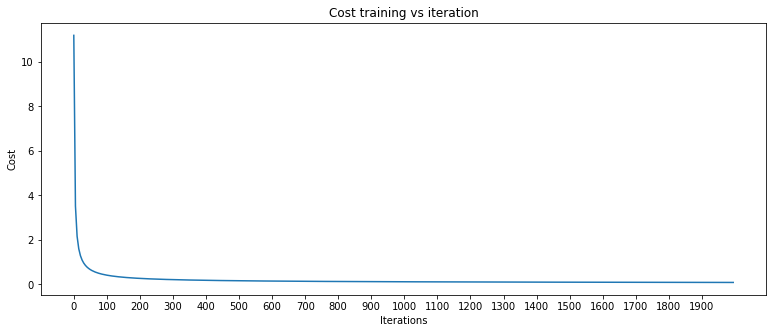

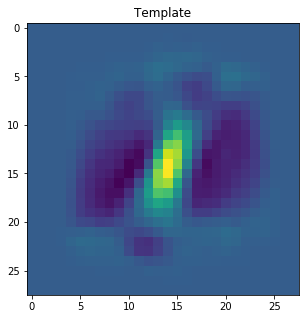

In [10]:
# Retrieve parameters w and b from dictionary "parameters"
w = parameters["w"]
b = parameters["b"]
    
# Predict test/train set examples (≈ 2 lines of code)
y_prediction_test = predict(w, b, x_test_flat)
y_prediction_train = predict(w, b, x_train_flat)

# Print train/test Errors
print('')
print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
print('')

plt.figure(figsize=(13,5))
plt.plot(range(0,2000,5),costs)
plt.title('Cost training vs iteration')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.xticks(range(0,2000,100))


plt.figure(figsize=(13,5))
plt.imshow(w.reshape(28,28))
plt.title('Template')


# **Handwritten 5’s from 6’s prediction**

In [0]:
# LOAD DATA
class5 = 5
class6 = 6

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[np.isin(y_train,[class5,class6]),:,:]
y_train = 1*(y_train[np.isin(y_train,[class5,class6])]>class5)
x_test = x_test[np.isin(y_test,[class5,class6]),:,:]
y_test = 1*(y_test[np.isin(y_test,[class5,class6])]>class5)

In [12]:
# RESHAPE

x_train_flat = x_train.reshape(x_train.shape[0],-1)
print(x_train_flat.shape)
print('Train: '+str(x_train_flat.shape[0])+' images and '+str(x_train_flat.shape[1])+' neurons \n')

x_test_flat = x_test.reshape(x_test.shape[0],-1)
print(x_test_flat.shape)
print('Test: '+str(x_test_flat.shape[0])+' images and '+str(x_test_flat.shape[1])+' neurons \n')

# STRANDARIZE
x_train_flat = x_train_flat / 255
x_test_flat = x_test_flat / 255

(11339, 784)
Train: 11339 images and 784 neurons 

(1850, 784)
Test: 1850 images and 784 neurons 



## Train the model

In [15]:
# Initialize parameters with zeros (≈ 1 line of code)
w, b = initialize_weights(x_train_flat.shape[1])

# Gradient descent (≈ 1 line of code)
learning_rate = 0.05
num_iterations = 2000
parameters, grads, costs = gradient_descent(w, b, x_train_flat.T, y_train, 2000, 0.005)

Cost after iteration 0: 10.024995
Cost after iteration 5: 6.205472
Cost after iteration 10: 4.736373
Cost after iteration 15: 3.967789
Cost after iteration 20: 3.490668
Cost after iteration 25: 3.162169
Cost after iteration 30: 2.920157
Cost after iteration 35: 2.733230
Cost after iteration 40: 2.583745
Cost after iteration 45: 2.460984
Cost after iteration 50: 2.358033
Cost after iteration 55: 2.270222
Cost after iteration 60: 2.194270
Cost after iteration 65: 2.127800
Cost after iteration 70: 2.069045
Cost after iteration 75: 2.016662
Cost after iteration 80: 1.969607
Cost after iteration 85: 1.927060
Cost after iteration 90: 1.888365
Cost after iteration 95: 1.852989
Cost after iteration 100: 1.820497
Cost after iteration 105: 1.790528
Cost after iteration 110: 1.762779
Cost after iteration 115: 1.736998
Cost after iteration 120: 1.712968
Cost after iteration 125: 1.690505
Cost after iteration 130: 1.669449
Cost after iteration 135: 1.649664
Cost after iteration 140: 1.631029
Cost a

## Test the model


train accuracy: 97.8834112355587 %
test accuracy: 98.05405405405405 %



Text(0.5, 1.0, 'Template')

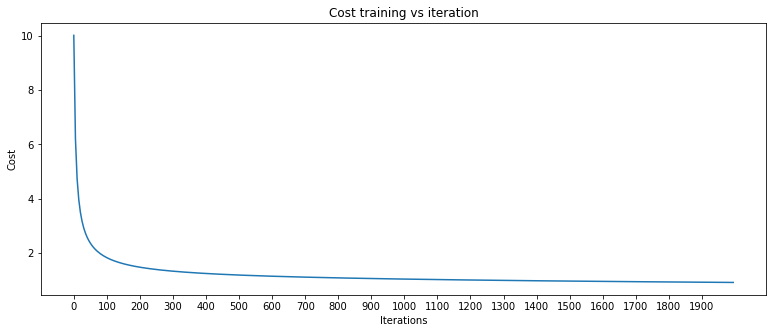

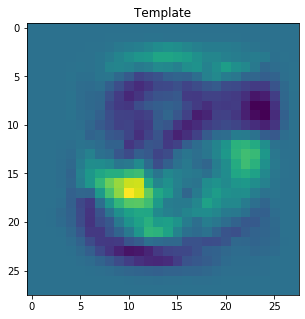

In [16]:
# Retrieve parameters w and b from dictionary "parameters"
w = parameters["w"]
b = parameters["b"]
    
# Predict test/train set examples (≈ 2 lines of code)
y_prediction_test = predict(w, b, x_test_flat)
y_prediction_train = predict(w, b, x_train_flat)

# Print train/test Errors
print('')
print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
print('')

plt.figure(figsize=(13,5))
plt.plot(range(0,2000,5),costs)
plt.title('Cost training vs iteration')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.xticks(range(0,2000,100))


plt.figure(figsize=(13,5))
plt.imshow(w.reshape(28,28))
plt.title('Template')